# CS312 - Data Analytics and Visualization Project

## By Glen Quadros (202051211) and Deepak (202052312)

Importing Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Dataset using Pandas

Kaggle Link to the dataset - https://www.kaggle.com/datasets/mirichoi0218/insurance

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
len(df)

1338

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Mapping male and female to 1, 0 respectively

In [6]:
df['sex'] = df['sex'].replace(('female', 'male'), (0,1))

Similarly mapping smoker and non-smoker to 1, 0 respectively

In [7]:
df['smoker'] = df['smoker'].replace(('yes', 'no'), (1,0))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


Getting all the unique regions in the dataset

In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Finding the number of male and female in the dataset using countplot (data visualization)

<AxesSubplot:xlabel='sex', ylabel='count'>

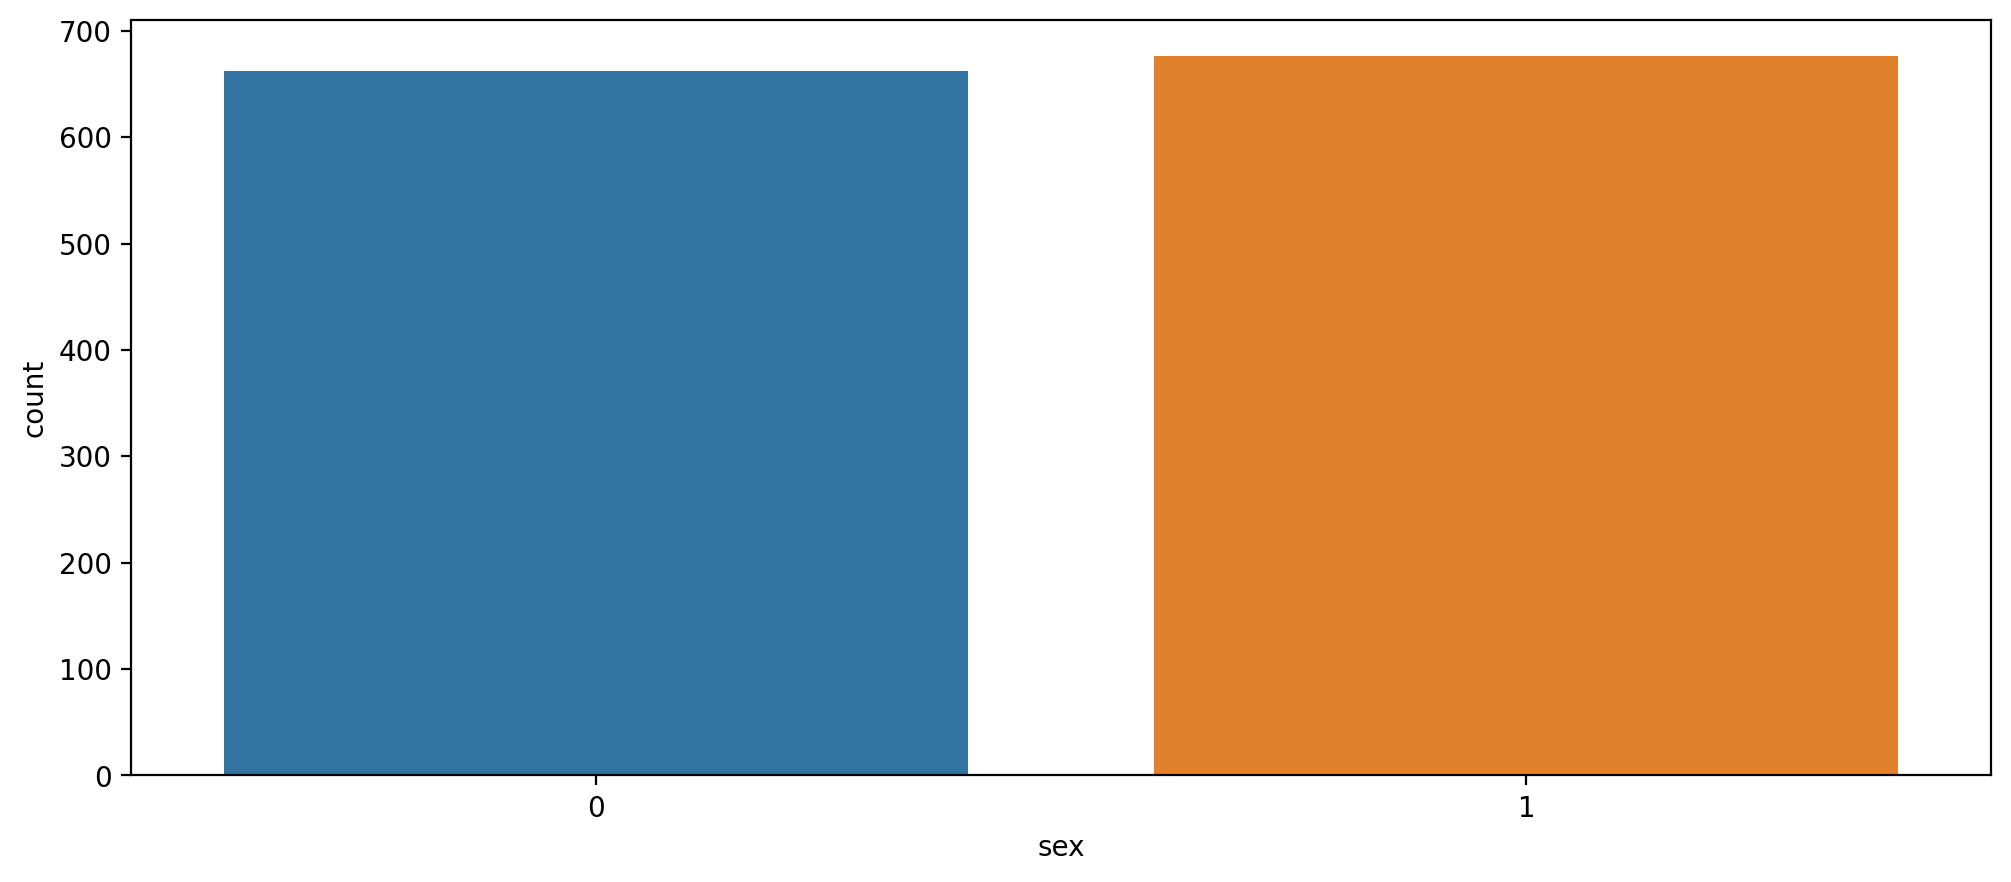

In [11]:
plt.figure(figsize=(12,5), dpi=200)
sns.countplot(data=df, x='sex')

Finding the number of smoker and non-smoker in the dataset

<AxesSubplot:xlabel='smoker', ylabel='count'>

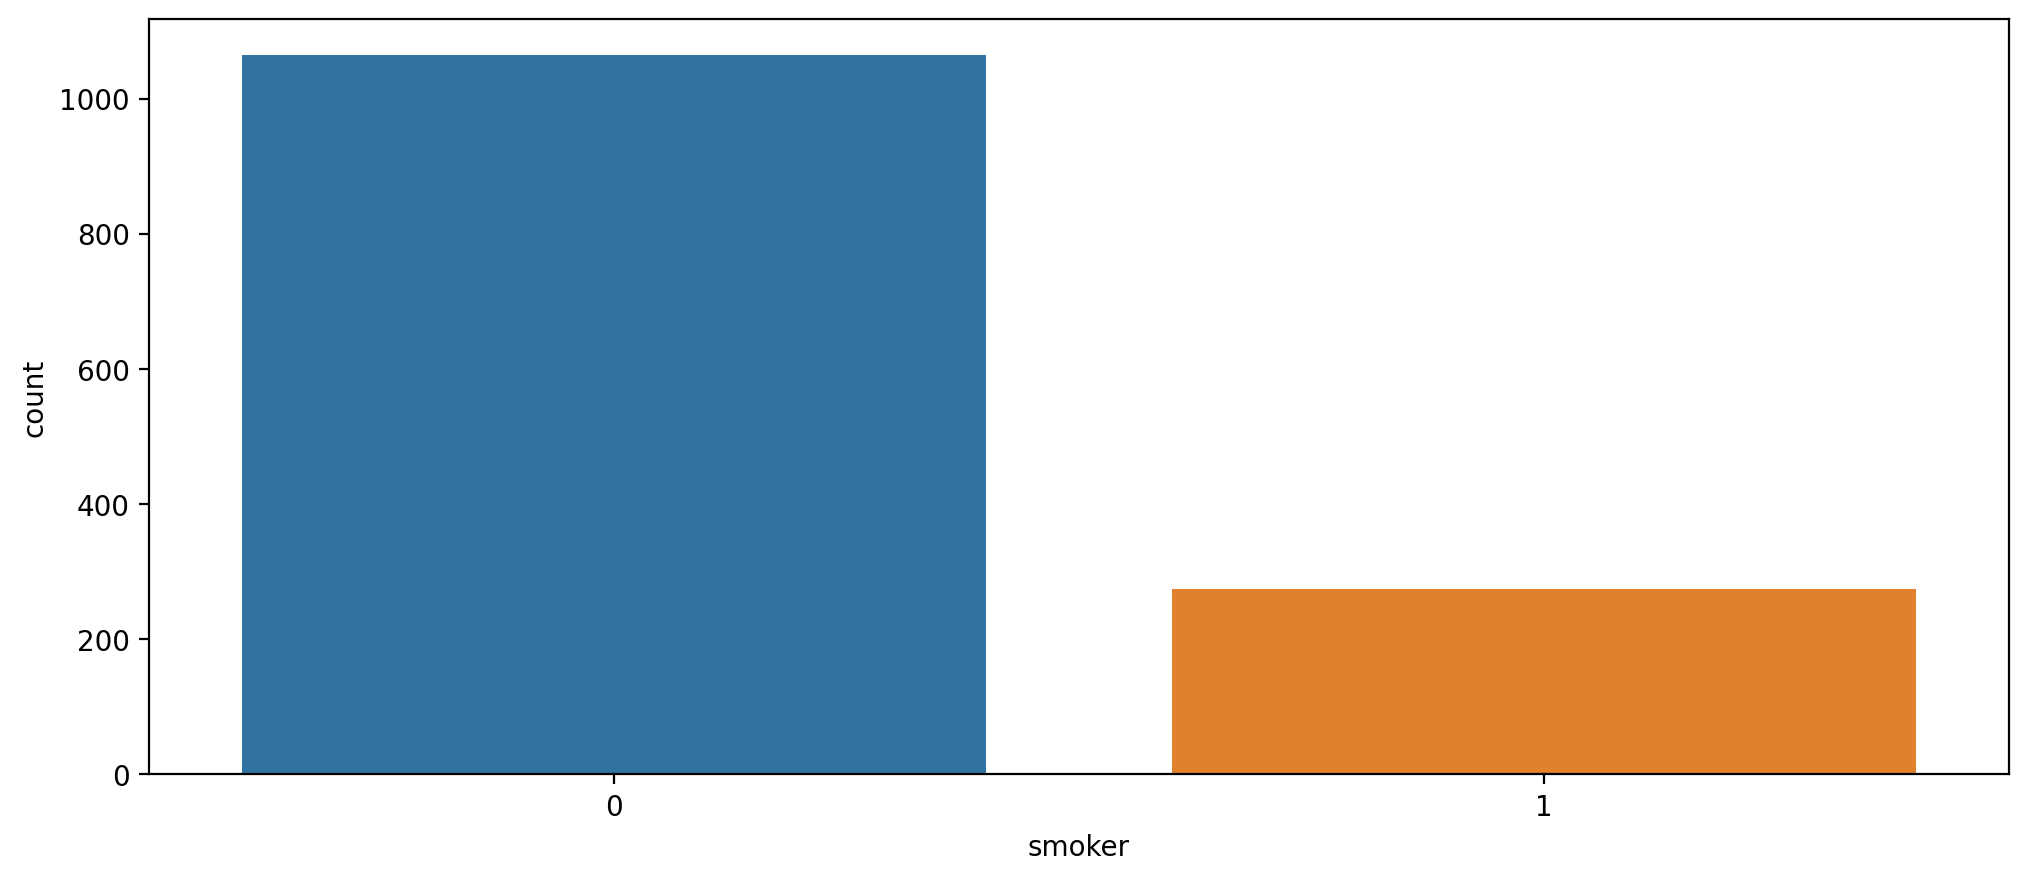

In [12]:
plt.figure(figsize=(12,5), dpi=200)
sns.countplot(data=df, x='smoker')

Finding the number of patients from various regions in the dataset using countplot

<AxesSubplot:xlabel='region', ylabel='count'>

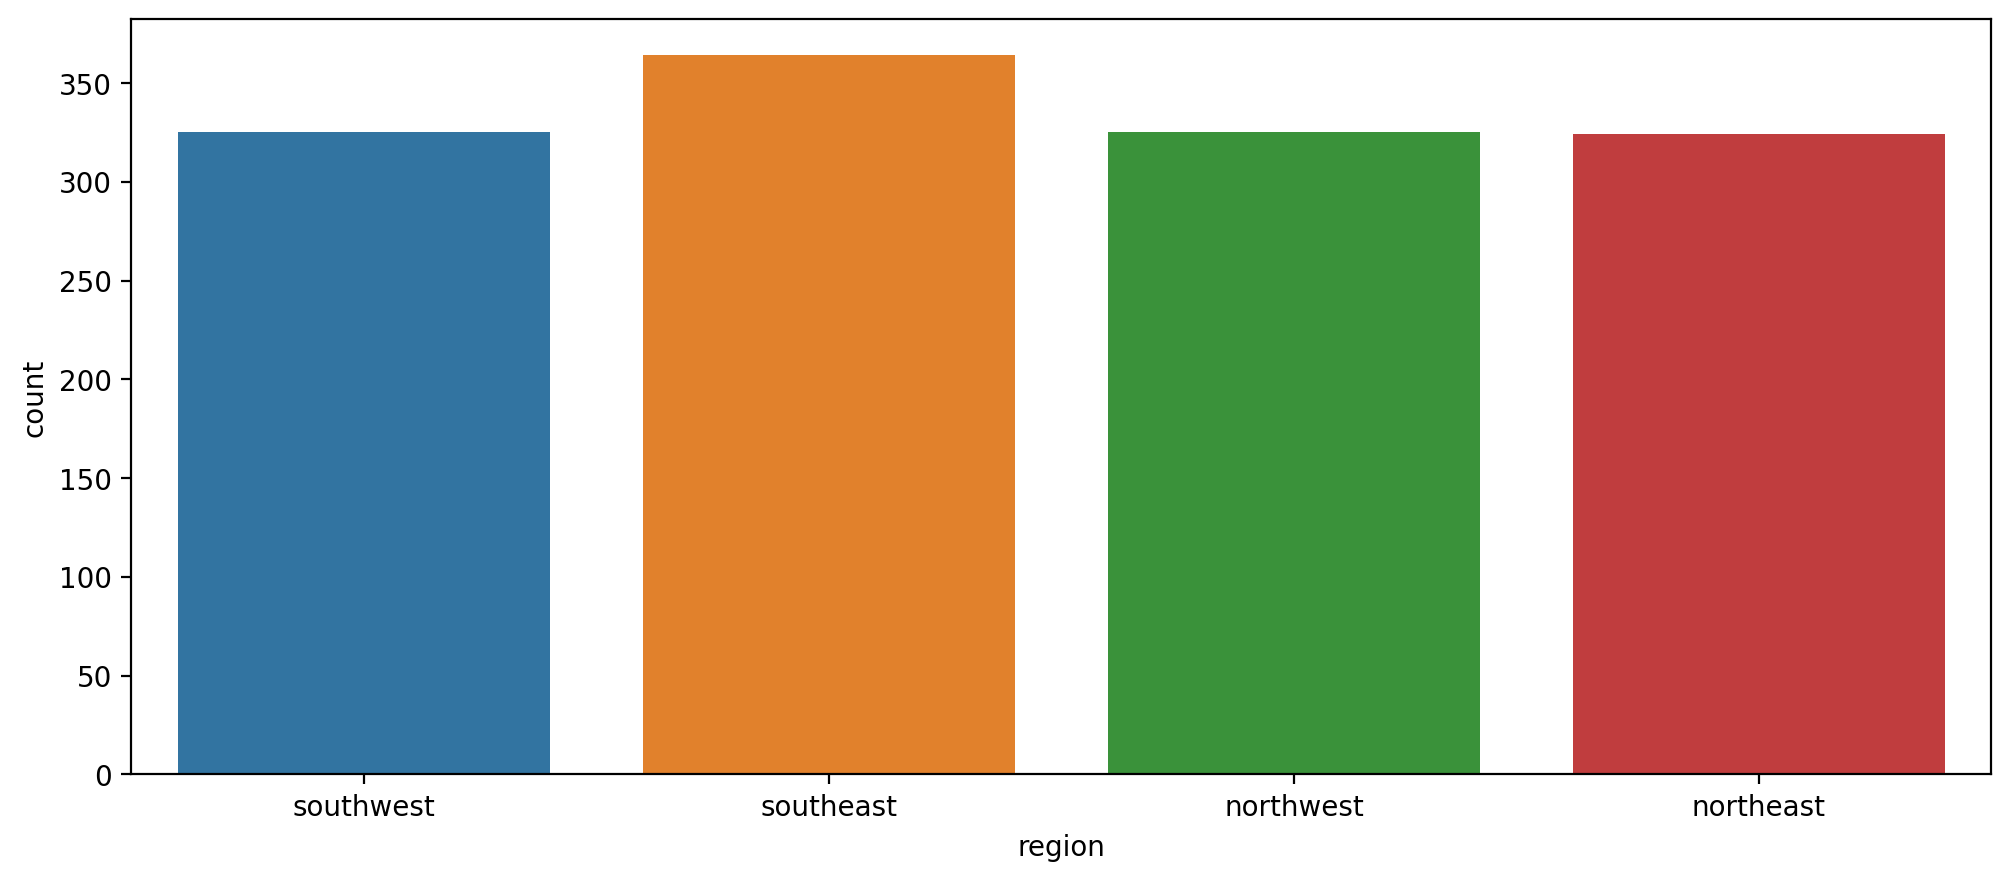

In [13]:
plt.figure(figsize=(12,5), dpi=200)
sns.countplot(data=df, x='region')

Plot pairwise relationships in a dataset 

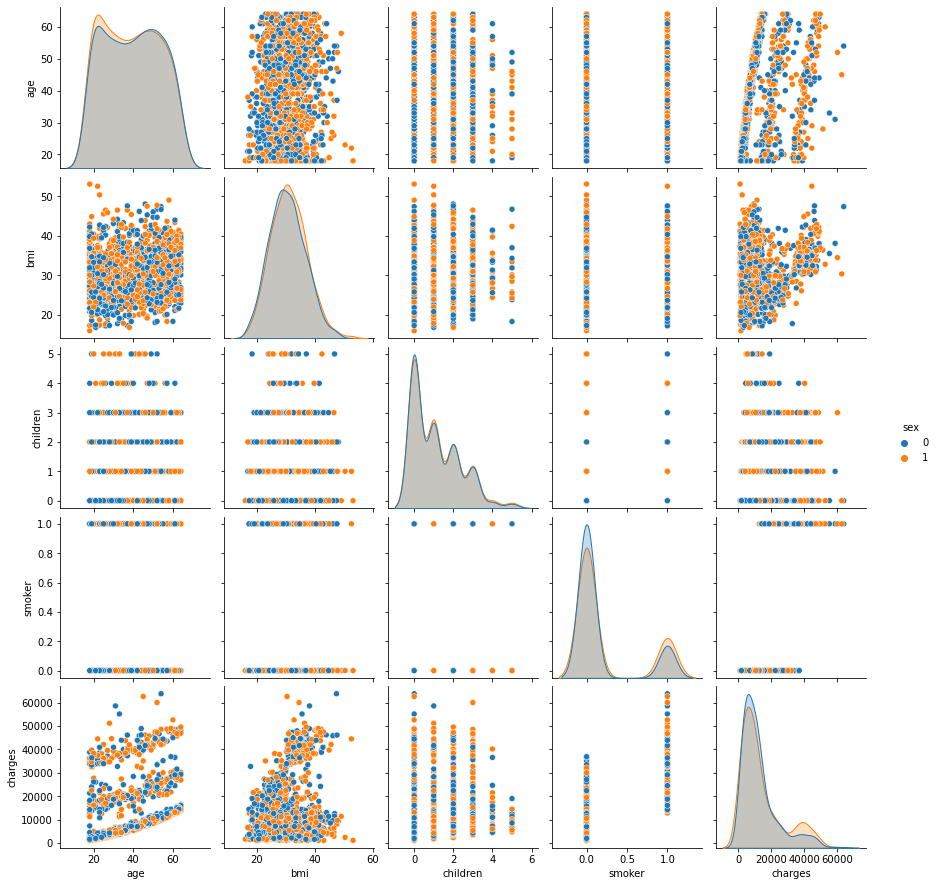

In [14]:
sns.pairplot(df, hue='sex')

Barplot of region vs smoker

Text(0, 0.5, 'Smoker')

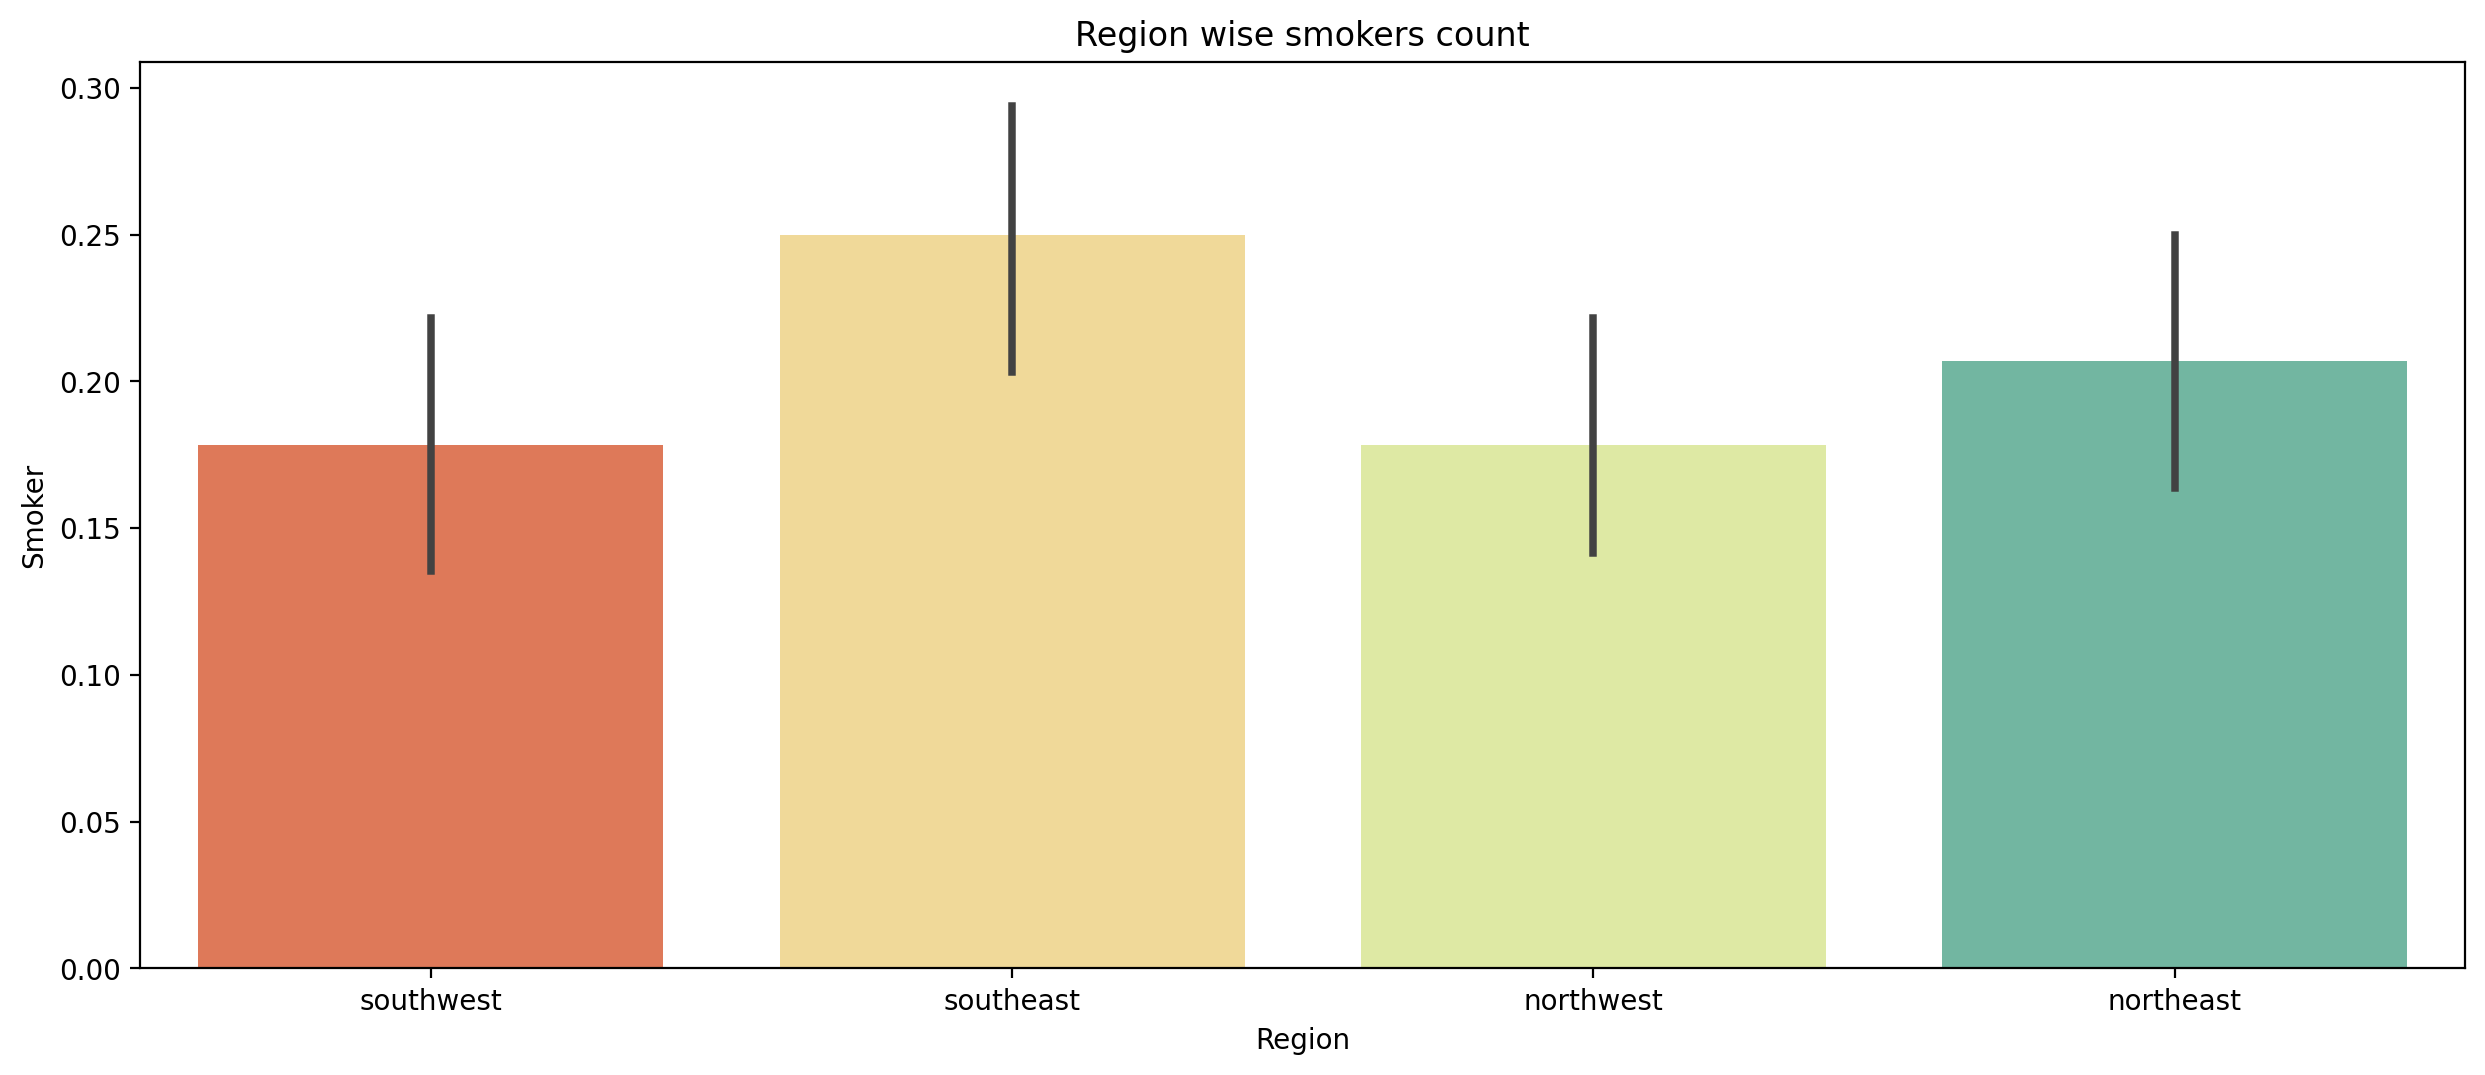

In [15]:
ax= plt.figure(figsize=(15,6), dpi=200)
sns.barplot(x='region', y='smoker', data=df, palette='Spectral' )
plt.title('Region wise smokers count')
plt.xlabel('Region')
plt.ylabel('Smoker')

Barplot showing the number of children each patient has and using gender as hue

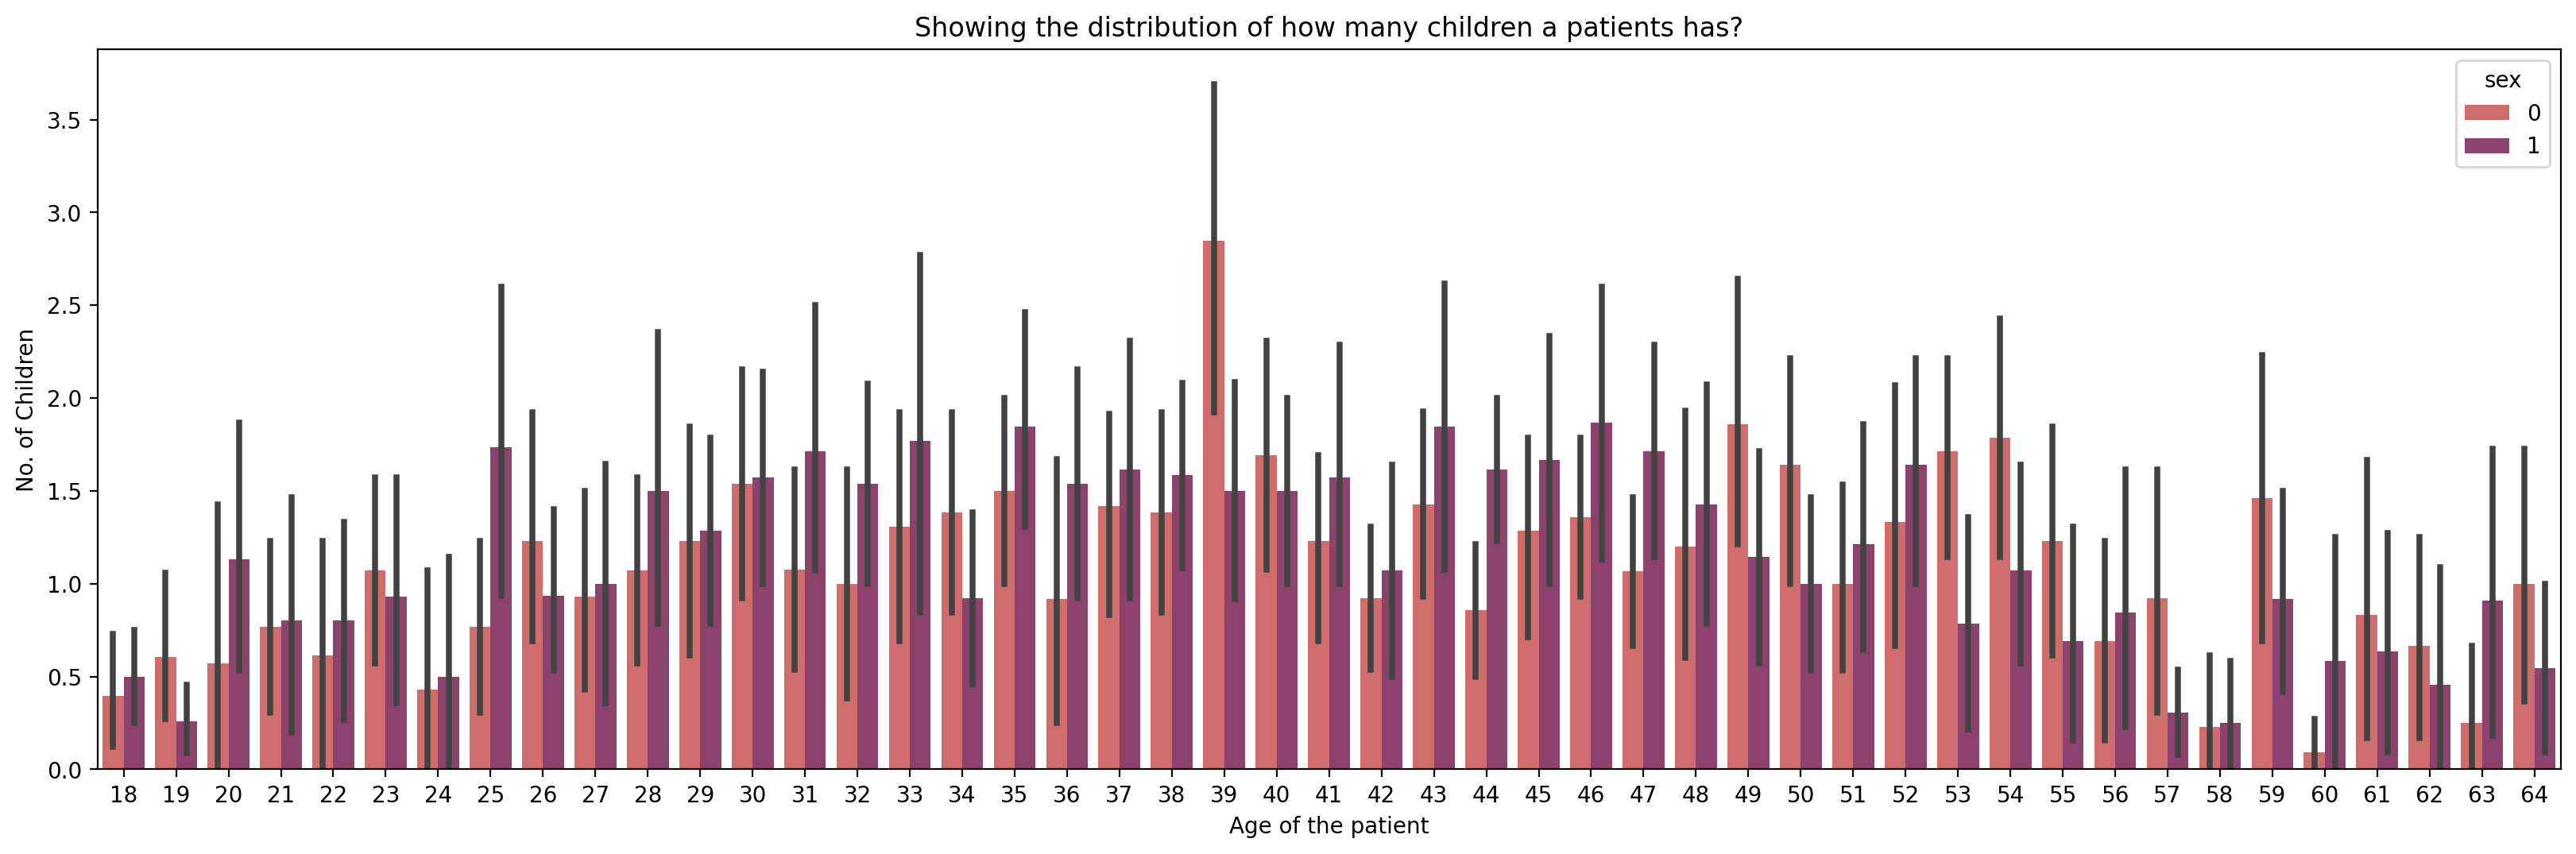

In [16]:
ax= plt.figure(figsize=(20,6), dpi=200)
sns.barplot(x='age', y='children', data=df, palette='flare', hue='sex' )
plt.title('Showing the distribution of how many children a patients has?')
plt.xlabel('Age of the patient')
plt.ylabel('No. of Children');

Crearting a lmplot of age vs charges and using region as hue

lmplot is a function in the Seaborn library of Python that creates a linear regression model plot

<Figure size 1200x1600 with 0 Axes>

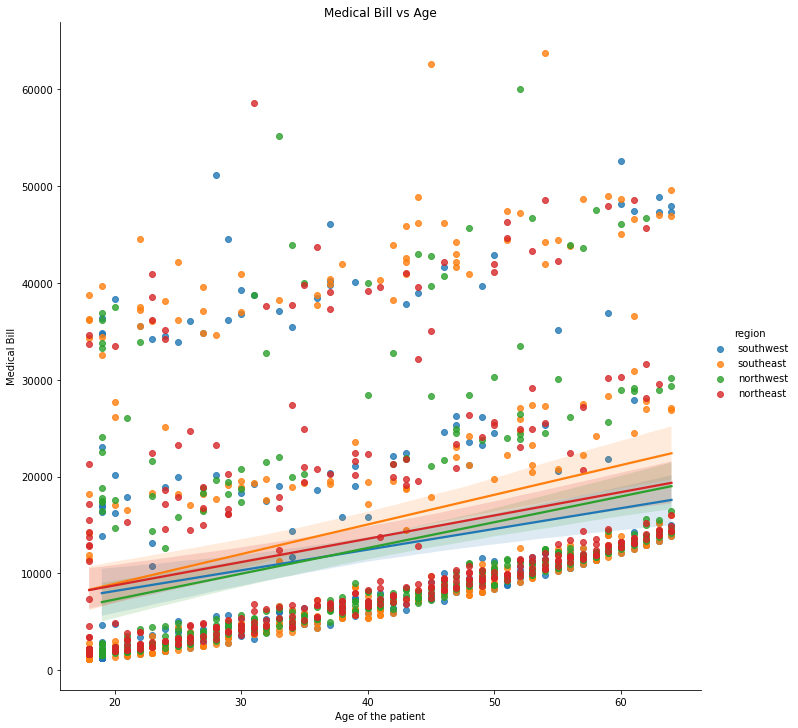

In [17]:
ax= plt.figure(figsize=(6,8), dpi=200)
sns.lmplot(x='age', y= 'charges',data=df,hue ='region',height=10,aspect=1)
plt.title('Medical Bill vs Age')
plt.xlabel('Age of the patient')
plt.ylabel('Medical Bill');

Creating a scatterplot of bill amount vs body mass index of the patient

<AxesSubplot:xlabel='bmi', ylabel='charges'>

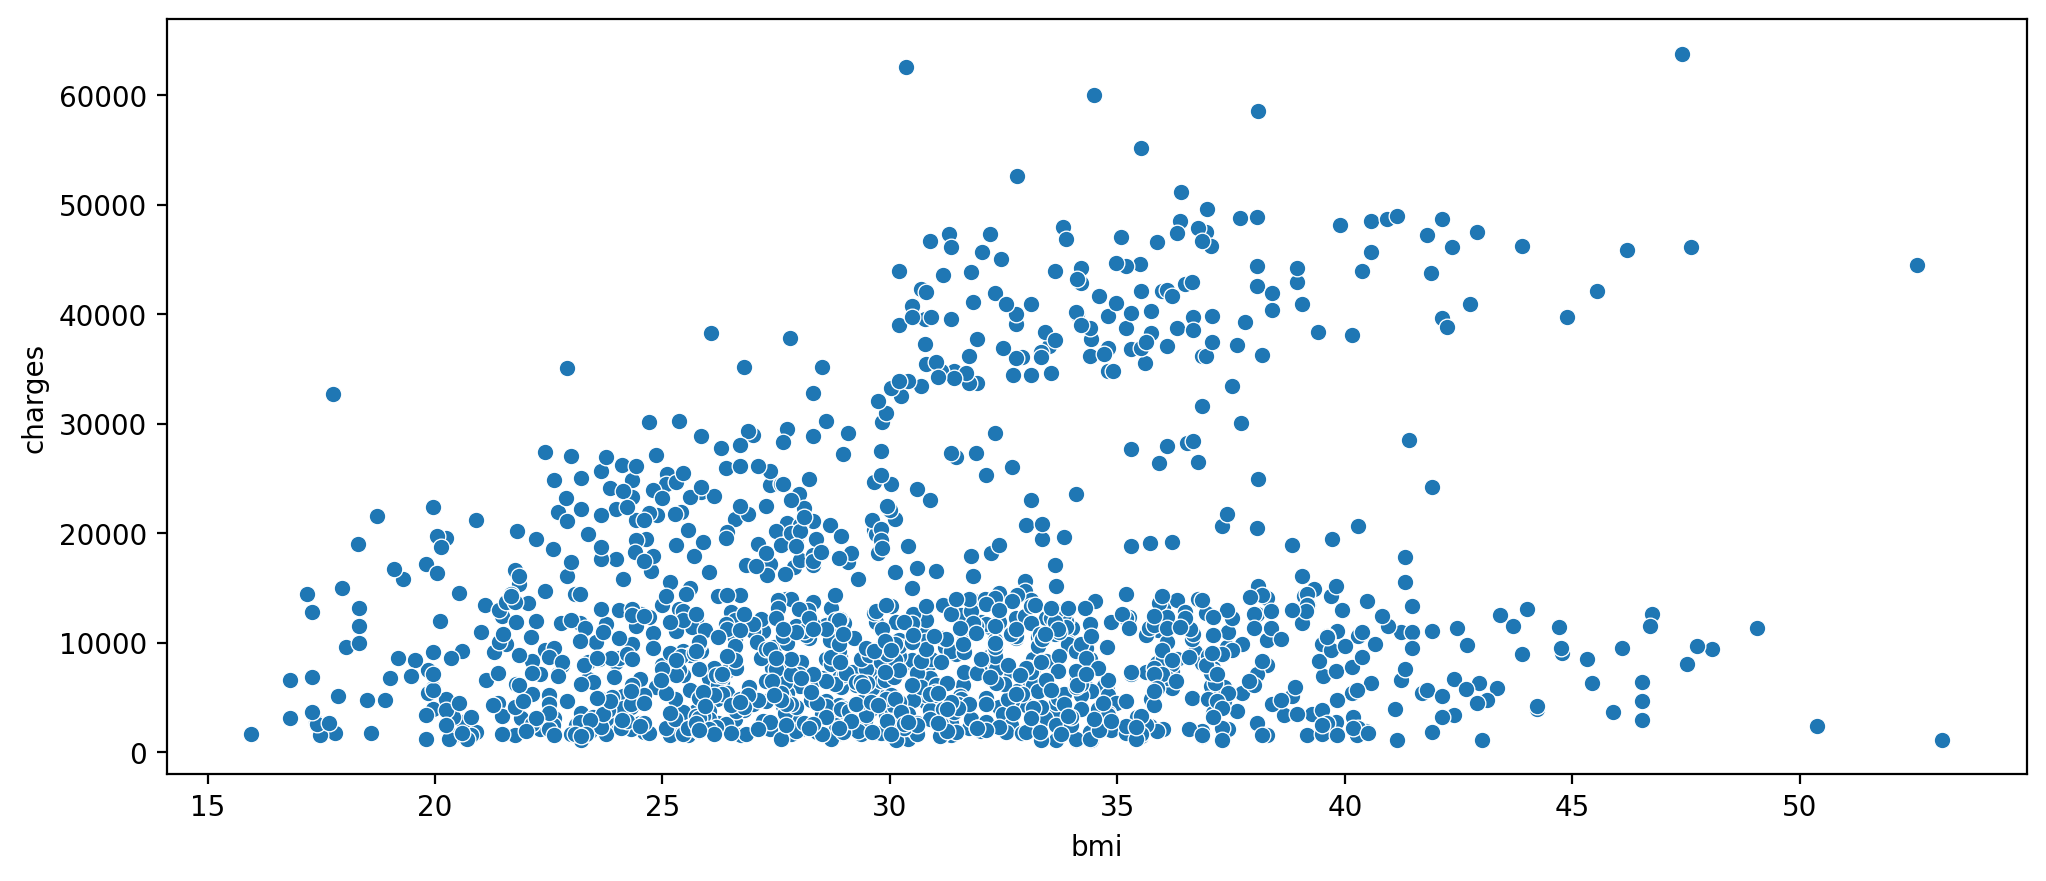

In [18]:
plt.figure(figsize=(12,5), dpi=200)
sns.scatterplot(y='charges', x='bmi', data=df)

Creating a distribution plot of age of all the patients

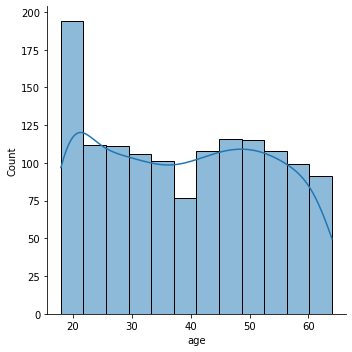

In [19]:
sns.displot(df['age'], kde=True)

Creating another distribution plot of body mass index of all the patients

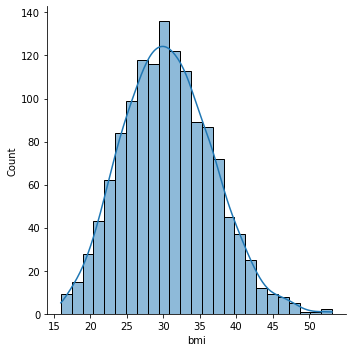

In [20]:
sns.displot(df['bmi'], kde=True)

Creating a distribution plot of the medical bill

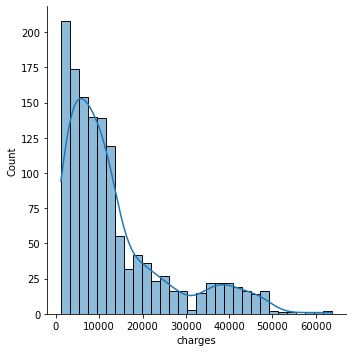

In [21]:
sns.displot(df['charges'], kde=True)

Here, our goal is to find patient belonging to which age group had the highest medical bill

In [22]:
max_medical_charge = df.groupby('age')['charges'].max()

In [23]:
max_medical_charge.sort_values(ascending=False)

age
54    63770.42801
45    62592.87309
52    60021.39897
31    58571.07448
33    55135.40209
60    52590.82939
28    51194.55914
64    49577.66240
59    48970.24760
44    48885.13561
63    48824.45000
57    48675.51770
61    48517.56315
58    47496.49445
51    47462.89400
62    46718.16325
53    46661.44240
46    46151.12450
37    46113.51100
43    45863.20500
48    45702.02235
29    44585.45587
22    44501.39820
55    44423.80300
47    44202.65360
34    43943.87610
56    43921.18370
42    43896.37630
36    43753.33705
50    42856.83800
25    42112.23560
38    41949.24410
30    40932.42950
23    40904.19950
41    40273.64550
39    40103.89000
40    40003.33225
35    39983.42595
49    39727.61400
19    39722.74620
27    39611.75770
18    38792.68560
20    38344.56600
24    38126.24650
32    37607.52770
26    36085.21900
21    26018.95052
Name: charges, dtype: float64

Creating a caategorical plot of 54 year old patients and checking how many of them were smokers

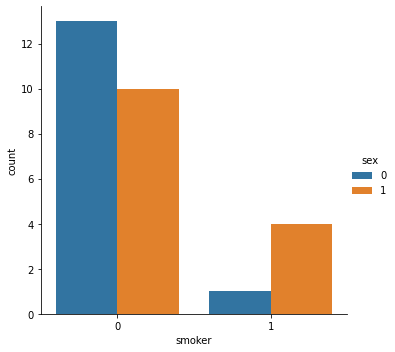

In [24]:
sns.catplot(data=df[df['age'] == 54], x='smoker', hue='sex', kind='count')

Creating subplots to find the medical bill for patients that have body mass index less than 30 and patients that have body mass index greater than or equal to 30

<AxesSubplot:xlabel='charges', ylabel='Count'>

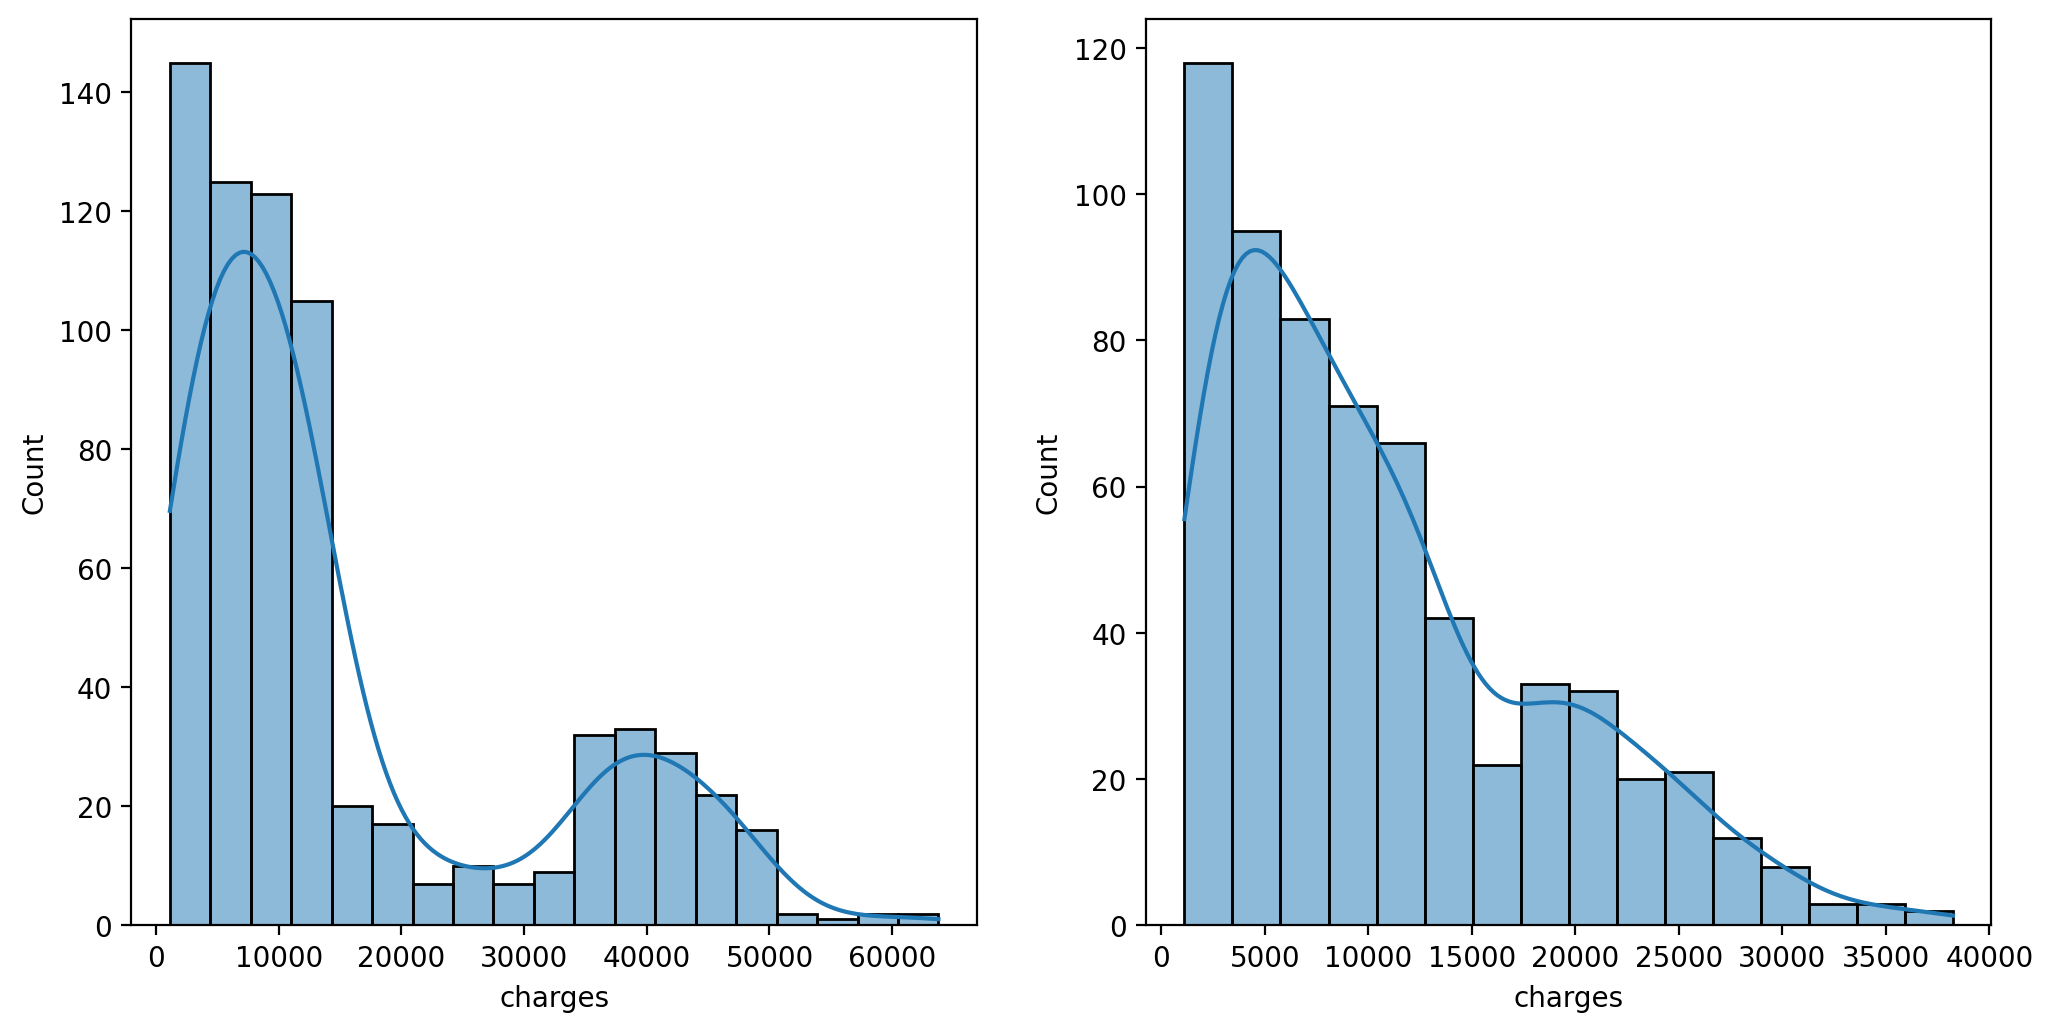

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi=200)
sns.histplot(df[(df.bmi >= 30)]['charges'], ax=axes[0], kde=True)
sns.histplot(df[(df.bmi < 30)]['charges'], ax=axes[1], kde=True)

Creating a lmplot of age vs medical bill and using smoking as hue

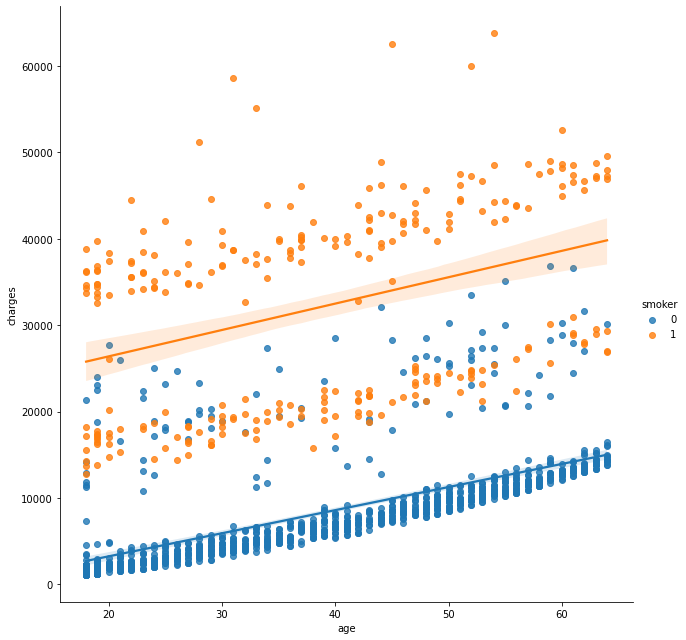

In [26]:
sns.lmplot(x='age', y='charges', hue='smoker', data=df, height=9)

Finding correlation between features of the data

In [27]:
df.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


Plotting heatmap using the correlation of the dataset

<AxesSubplot:>

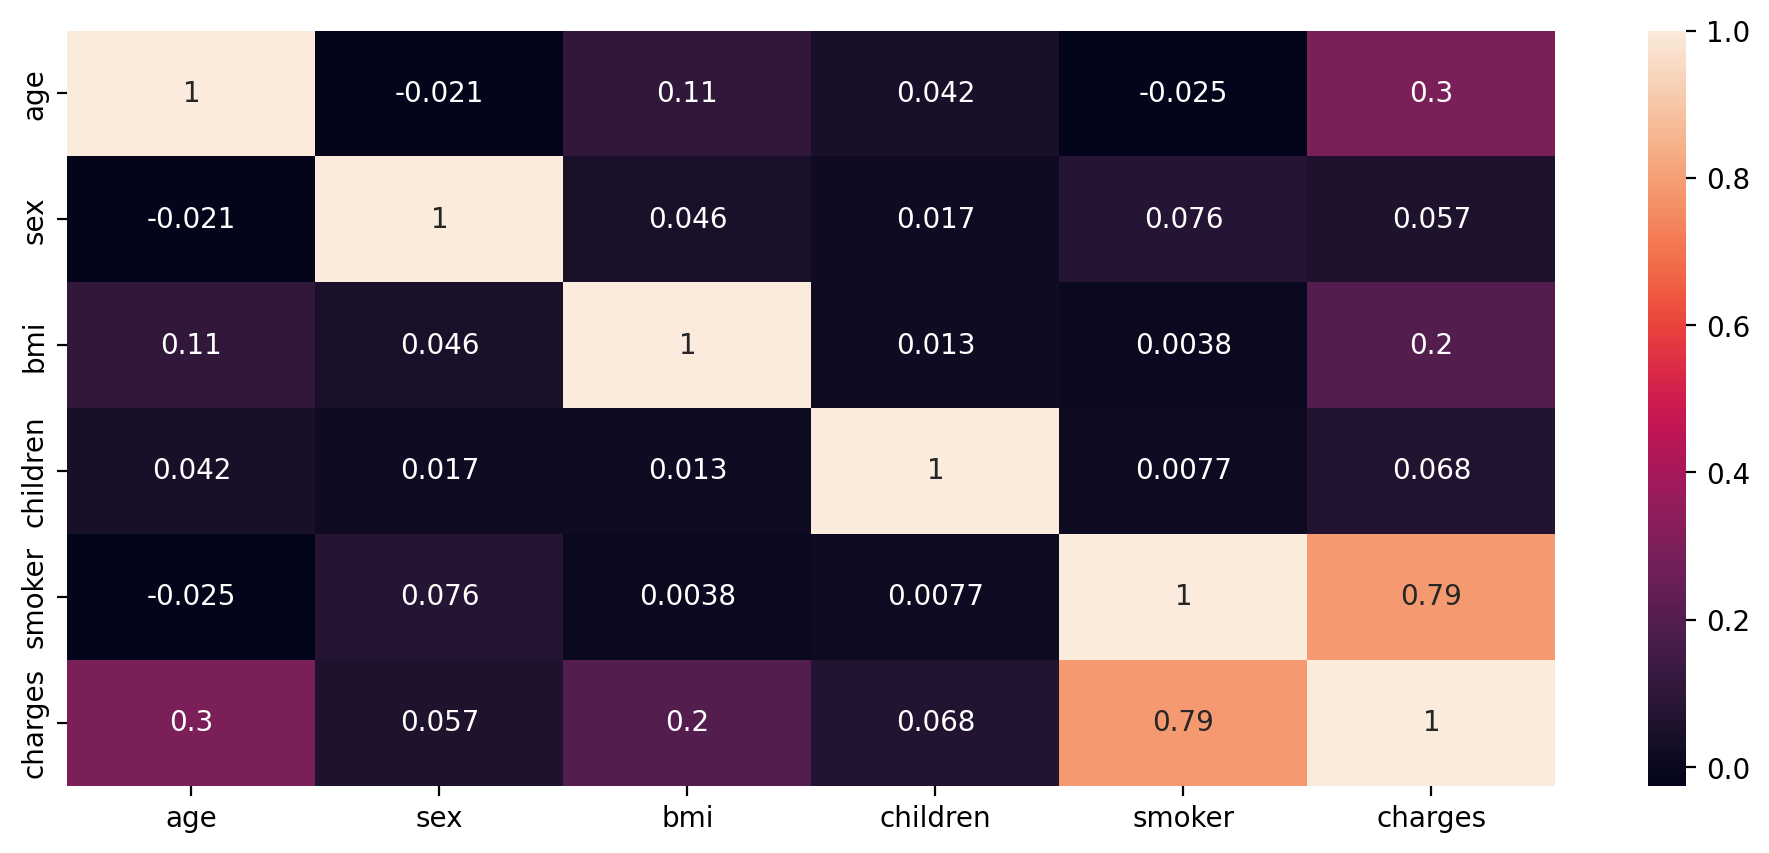

In [28]:
plt.figure(figsize=(12,5), dpi=200)
sns.heatmap(df.corr(), annot=True)

A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

A contingency table is a table that displays the frequency distribution of two or more categorical variables

chi2: The chi-square test statistic.

p: The p-value associated with the chi-square statistic.

dof: The degrees of freedom for the test.

expected: The expected frequencies, based on the marginal sums of the contingency table.

In [29]:
from scipy.stats import chi2_contingency

cont_table = pd.crosstab(df['sex'], df['smoker'])

print(cont_table)

chi2, p, dof, expected = chi2_contingency(cont_table)
print(f"Chi-square test results: chi2={chi2}, p={p}, dof={dof}")

smoker    0    1
sex             
0       547  115
1       517  159
Chi-square test results: chi2=7.39291081459996, p=0.006548143503580696, dof=1


The standard error is a measure of the variability of a statistic, such as the mean or proportion, across multiple samples taken from the same population. It represents the standard deviation of the sampling distribution of the statistic, and is typically used to estimate the precision of the sample estimate relative to the true population parameter. A smaller standard error indicates that the sample estimate is more precise and therefore more likely to be closer to the true population parameter.

In [30]:
import numpy as np

s = np.std(df['charges'], ddof=1)

n = len(df)

SE = s / np.sqrt(n)

print(f"Standard error: {SE:.2f}")

Standard error: 331.07


Bootstrap is a statistical resampling technique that involves repeatedly drawing samples of data from the original dataset with replacement. This resampling process allows for the estimation of the sampling distribution of a given statistic, such as the mean or variance, which can be used to generate confidence intervals or test hypotheses about the population parameter of interest. The basic idea behind bootstrap is that by repeatedly sampling from the same data, we can simulate the process of drawing samples from the population, and obtain an estimate of the sampling distribution of the statistic without making any assumptions about the underlying distribution. The bootstrap procedure is particularly useful when the distribution of the data is unknown or non-normal, or when the sample size is small.

In [31]:
n_bootstraps = 10000

boot_means = np.empty(n_bootstraps)

for i in range(n_bootstraps):
    bootstrap_sample = np.random.choice(df['charges'], size=len(df), replace=True)
    boot_means[i] = np.mean(bootstrap_sample)

boot_mean = np.mean(boot_means)
boot_std = np.std(boot_means)

print(f"Bootstrap mean: {boot_mean:.2f}")
print(f"Bootstrap standard deviation: {boot_std:.2f}")

Bootstrap mean: 13271.58
Bootstrap standard deviation: 329.98


A confidence interval is a range of values that is likely to contain the true value of a population parameter with a certain degree of confidence or probability. In other words, it is an estimate of an unknown population parameter based on a sample from the population, accompanied by a measure of the uncertainty or variability of the estimate. A 95% confidence interval means that if we repeated the sampling and estimation process many times, 95% of the resulting intervals would contain the true population parameter.

In [32]:
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

print(f"95% confidence interval: [{ci_lower:.2f}, {ci_upper:.2f}]")

95% confidence interval: [12639.56, 13929.88]


Pearson residual is a measure of the difference between the observed values of the dependent variable and the values predicted by a statistical model. It is calculated by taking the difference between the observed value and the predicted value, and then dividing by the square root of the variance of the dependent variable predicted by the model. Pearson residuals are used to assess the goodness-of-fit of a statistical model, and to identify outliers or influential observations. The total Pearson residual is the sum of the absolute values of all the individual Pearson residuals.

In [33]:
import statsmodels.api as sm

X = df[['age', 'bmi', 'children', 'smoker']]
X = sm.add_constant(X)  
y = df['charges']
model = sm.OLS(y, X).fit()

y_hat = model.predict(X)

resid = y - y_hat

pearson_resid = resid / np.sqrt(model.scale)
total_pearson_resid = np.sum(np.abs(pearson_resid))
total_pearson_resid

921.4357038009853

**Thank You**